In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL # python library for image processing
from tensorflow import keras
from tensorflow.keras import Sequential
import cv2
from tensorflow.keras import layers


# Load data

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

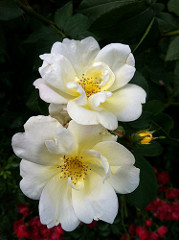

In [20]:
PIL.Image.open(str(roses[0]))

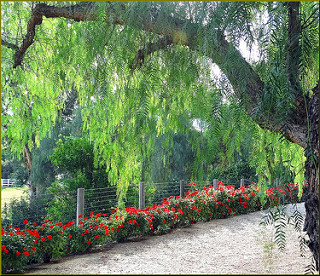

In [21]:
PIL.Image.open(str(roses[5]))

In [25]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

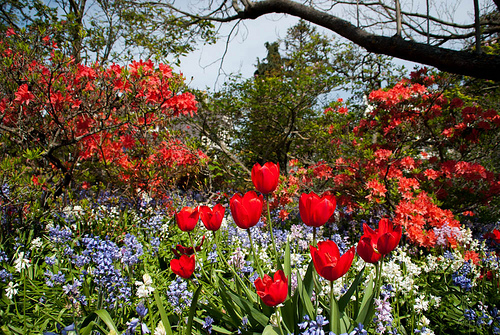

In [26]:
PIL.Image.open(str(tulips[5]))

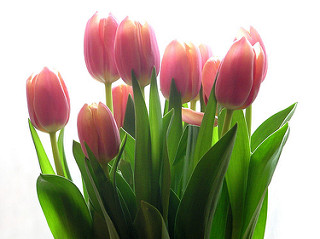

In [27]:
PIL.Image.open(str(tulips[12]))

In [42]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [43]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [45]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [46]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))  # imread function in opencv read the all images from the given path and converted into 3D numpy array, also 
img                  #cv2 do not recognise window path

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [47]:
img.shape

(240, 179, 3)

In [48]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [50]:
X, y = [], []

for flower_name , image in flowers_images_dict.items():
    print(flower_name)
    print(len(image))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [54]:
X, y = [], []

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(180,180))
        X.append(resize_img) 
        y.append(flowers_labels_dict[flower_name])                 

In [60]:
y[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [61]:
X = np.array(X)
y = np.array(y)

# spliting data into trainin and testing

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state = 0)

In [63]:
len(X_train)

2752

In [64]:
len(y_test)

918

In [65]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255    

In [66]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [73]:
classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(classes)
])

model.compile(optimizer ='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled , y_train , epochs = 30)

Epoch 1/30
86/86 [==============================] - 30s 333ms/step - loss: 1.3225 - accuracy: 0.4589
Epoch 2/30
86/86 [==============================] - 28s 326ms/step - loss: 0.9899 - accuracy: 0.6239
Epoch 3/30
86/86 [==============================] - 27s 319ms/step - loss: 0.8015 - accuracy: 0.6991
Epoch 4/30
86/86 [==============================] - 33s 380ms/step - loss: 0.5641 - accuracy: 0.7954
Epoch 5/30
86/86 [==============================] - 33s 383ms/step - loss: 0.3392 - accuracy: 0.8790
Epoch 6/30
86/86 [==============================] - 33s 382ms/step - loss: 0.1919 - accuracy: 0.9375
Epoch 7/30
86/86 [==============================] - 34s 394ms/step - loss: 0.1081 - accuracy: 0.9662
Epoch 8/30
86/86 [==============================] - 34s 400ms/step - loss: 0.0949 - accuracy: 0.9746
Epoch 9/30
86/86 [==============================] - 33s 380ms/step - loss: 0.0416 - accuracy: 0.9902
Epoch 10/30
86/86 [==============================] - 33s 384ms/step - loss: 0.0222 - accura

In [75]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 213ms/step - loss: 2.6206 - accuracy: 0.6547


[2.6205687522888184, 0.6546840667724609]

here we see the high accuracy at training time (99%) . but her at  on testing data accuraccy is 65% only it indicate the overfitting 
let make some prediction before we use data augmentation 

In [77]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 84ms/step


array([[ -0.51123935,  27.38981   ,   0.777103  , -12.445277  ,
        -14.376745  ],
       [ 11.857742  ,  -0.38677803,  -7.9527535 ,  -5.63027   ,
          2.59995   ],
       [ -2.6660976 ,  -1.7261139 ,  17.62293   , -21.390759  ,
         -9.561356  ],
       ...,
       [  2.215563  ,  -7.1274467 , -10.511448  ,   8.587817  ,
          9.269539  ],
       [ -4.3427286 ,   6.0489783 ,   5.840016  ,  -2.3808568 ,
          2.8462381 ],
       [  1.1611873 , -14.735655  ,   1.8227558 ,   9.832317  ,
          4.790562  ]], dtype=float32)

In [79]:
score = tf.nn.softmax(predictions[0])

In [80]:
np.argmax(score)

1

In [82]:
y_test[0]

1

# Improve the test accuracy using data augmentation

In [86]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

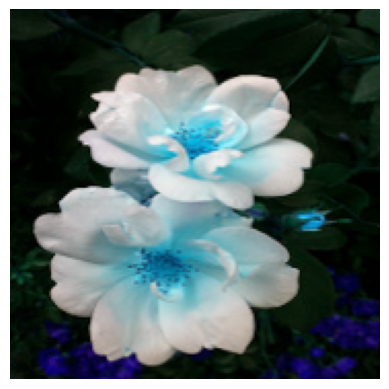

In [87]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
# image after tha data augmentation 
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation or a dropout layer

In [90]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 36s 390ms/step - loss: 1.2534 - accuracy: 0.4669
Epoch 2/30
86/86 [==============================] - 31s 363ms/step - loss: 1.0175 - accuracy: 0.5992
Epoch 3/30
86/86 [==============================] - 31s 366ms/step - loss: 0.8932 - accuracy: 0.6519
Epoch 4/30
86/86 [==============================] - 32s 370ms/step - loss: 0.8068 - accuracy: 0.6882
Epoch 5/30
86/86 [==============================] - 31s 360ms/step - loss: 0.8012 - accuracy: 0.6915
Epoch 6/30
86/86 [==============================] - 32s 370ms/step - loss: 0.7238 - accuracy: 0.7184
Epoch 7/30
86/86 [==============================] - 31s 361ms/step - loss: 0.7049 - accuracy: 0.7246
Epoch 8/30
86/86 [==============================] - 31s 365ms/step - loss: 0.6535 - accuracy: 0.7562
Epoch 9/30
86/86 [==============================] - 31s 364ms/step - loss: 0.6340 - accuracy: 0.7518
Epoch 10/30
86/86 [==============================] - 31s 361ms/step - loss: 0.6271 - accura

In [91]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 3s 87ms/step - loss: 1.1846 - accuracy: 0.7015


[1.184635877609253, 0.7015250325202942]